## Libraries

In [105]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib_venn import venn2_unweighted
from matplotlib import style

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as mse


from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import re
import sys
import requests
import time
import datetime 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sklearn.metrics as metrics

from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor

import statsmodels.api as sm

## Conditions

In [3]:
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('data/data_eeip.csv')

In [10]:
df.drop(columns = 'county_fips', inplace =True)

In [12]:
df.fillna(0, inplace = True)

## EDA

In [16]:
df.describe()

,county_pop,utilitypv_techpot_quint,utility_pv_technical_generation_potential_mwh,residentialpv_techpot_quint,residential_pv_technical_generation_potential_mwh,landbasedwind_techpot_quint,land_based_wind_technical_generation_potential_mwh,commercialpv_techpot_quint,commercial_pv_technical_generation_potential_mwh,commercialpv_lcoe_cap_quint,commercial_pv_lcoe_capital_price_per_mw_median,commercialpv_lcoe_quint,commercial_pv_lcoe_price_per_mwh_median,geothermal_lcoe_cap_quint,geothermal_lcoe_capital_price_per_mw_median,geothermal_lcoe_quint,geothermal_lcoe_price_per_mwh_median,hydro_lcoe_cap_quint,hydro_lcoe_capital_price_per_mw_median,hydro_lcoe_quint,hydro_lcoe_price_per_mwh_median,landbasedwind_lcoe_cap_quint,land_based_wind_lcoe_capital_price_per_mw_median,landbasedwind_lcoe_quint,land_based_wind_lcoe_price_per_mwh_median,utilitypv_lcoe_cap_quint,pv_lcoe_capital_price_per_mw_median,utilitypv_lcoe_quint,pv_lcoe_price_per_mwh_median,residentialpv_lcoe_cap_quint,residential_pv_lcoe_capital_price_per_mw_median,residentialpv_lcoe_quint,residential_pv_lcoe_price_per_mwh_median,bev_growth_quint,hev_growth_quint,phev_growth_quint,icev_growth_quint,bev_prop_change,hev_prop_change,phev_prop_change,icev_prop_change,bev_2018_reference_vehicle_counts,bev_2050_reference_vehicle_counts,hev_gasoline_2018_reference_vehicle_counts,hev_gasoline_2050_reference_vehicle_counts,phev_2018_reference_vehicle_counts,phev_2050_reference_vehicle_counts,icev_gasoline_2018_reference_vehicle_counts,icev_gasoline_2050_reference_vehicle_counts,reopt_savings_quint,cost_savings_per_county,energyburden_indicator,energyburden_1_prop,energyburden_2_prop,energyburden_3_prop,energyburden_4_prop,unemployment_quint,unemprate2020,mining_quint,pctempmining,ruralurbancontinuumcode2013,type_2015_farming_no,type_2015_mining_no,population_loss_2015_update,perpov_1980_0711,minority_indicator,minority_pop_1_prop,minority_pop_2_prop,minority_pop_3_prop,minority_pop_4_prop,minority_pop_5_prop,lowincome_indicator,lowincome_pop_1_prop,lowincome_pop_2_prop,lowincome_pop_3_prop,lowincome_pop_4_prop,lowincome_pop_5_prop,lessthanhs_indicator,lessthanhs_pop_1_prop,lessthanhs_pop_2_prop,lessthanhs_pop_3_prop,lessthanhs_pop_4_prop,lessthanhs_pop_5_prop,pm25_indicator,pm25_1_prop,pm25_2_prop,pm25_3_prop,pm25_4_prop,pm25_5_prop,ozone_indicator,ozone_1_prop,ozone_2_prop,ozone_3_prop,ozone_4_prop,ozone_5_prop,leadpaint_indicator,leadpaint_1_prop,leadpaint_2_prop,leadpaint_3_prop,leadpaint_4_prop,leadpaint_5_prop,diesel_indicator,dieselparticulate_1_prop,dieselparticulate_2_prop,dieselparticulate_3_prop,dieselparticulate_4_prop,dieselparticulate_5_prop,cancer_indicator,cancerriskairtoxics_1_prop,cancerriskairtoxics_2_prop,cancerriskairtoxics_3_prop,cancerriskairtoxics_4_prop,cancerriskairtoxics_5_prop,respiratory_indicator,respiratoryhazardairtoxics_1_prop,respiratoryhazardairtoxics_2_prop,respiratoryhazardairtoxics_3_prop,respiratoryhazardairtoxics_4_prop,respiratoryhazardairtoxics_5_prop,traffic_indicator,trafficproxvol_1_prop,trafficproxvol_2_prop,trafficproxvol_3_prop,trafficproxvol_4_prop,trafficproxvol_5_prop,wastewater_indicator,wastewaterdischarge_1_prop,wastewaterdischarge_2_prop,wastewaterdischarge_3_prop,wastewaterdischarge_4_prop,wastewaterdischarge_5_prop,npl_indicator,nplprox_1_prop,nplprox_2_prop,nplprox_3_prop,nplprox_4_prop,nplprox_5_prop,rmp_indicator,rmpprox_1_prop,rmpprox_2_prop,rmpprox_3_prop,rmpprox_4_prop,rmpprox_5_prop,tsdf_indicator,tsdfprox_1_prop,tsdfprox_2_prop,tsdfprox_3_prop,tsdfprox_4_prop,tsdfprox_5_prop
count,3.108000e+03,3108.000000,3.108000e+03,3108.000000,3.108000e+03,3108.000000,3.108000e+03,3108.000000,3.108000e+03,3108.0,3108.0,3108.000000,3108.000000,3108.000000,3.108000e+03,3108.000000,3108.000000,3108.000000,3.108000e+03,3108.000000,3108.000000,3108.000000,3.108000e+03,3108.000000,3108.000000,3108.000000,3.108000e+03,3108.000000,3108.000000,3108.0,3108.0,3108.000000,3108.000000,3108.000000,3108.000000,3108.000000,3108.000000,3108.000000,3108.000000

In [ ]:
#pd.plotting.scatter_matrix(df,figsize=(15, 15), marker='o', hist_kwds={'bins': 20}, s=60, alpha=.8)

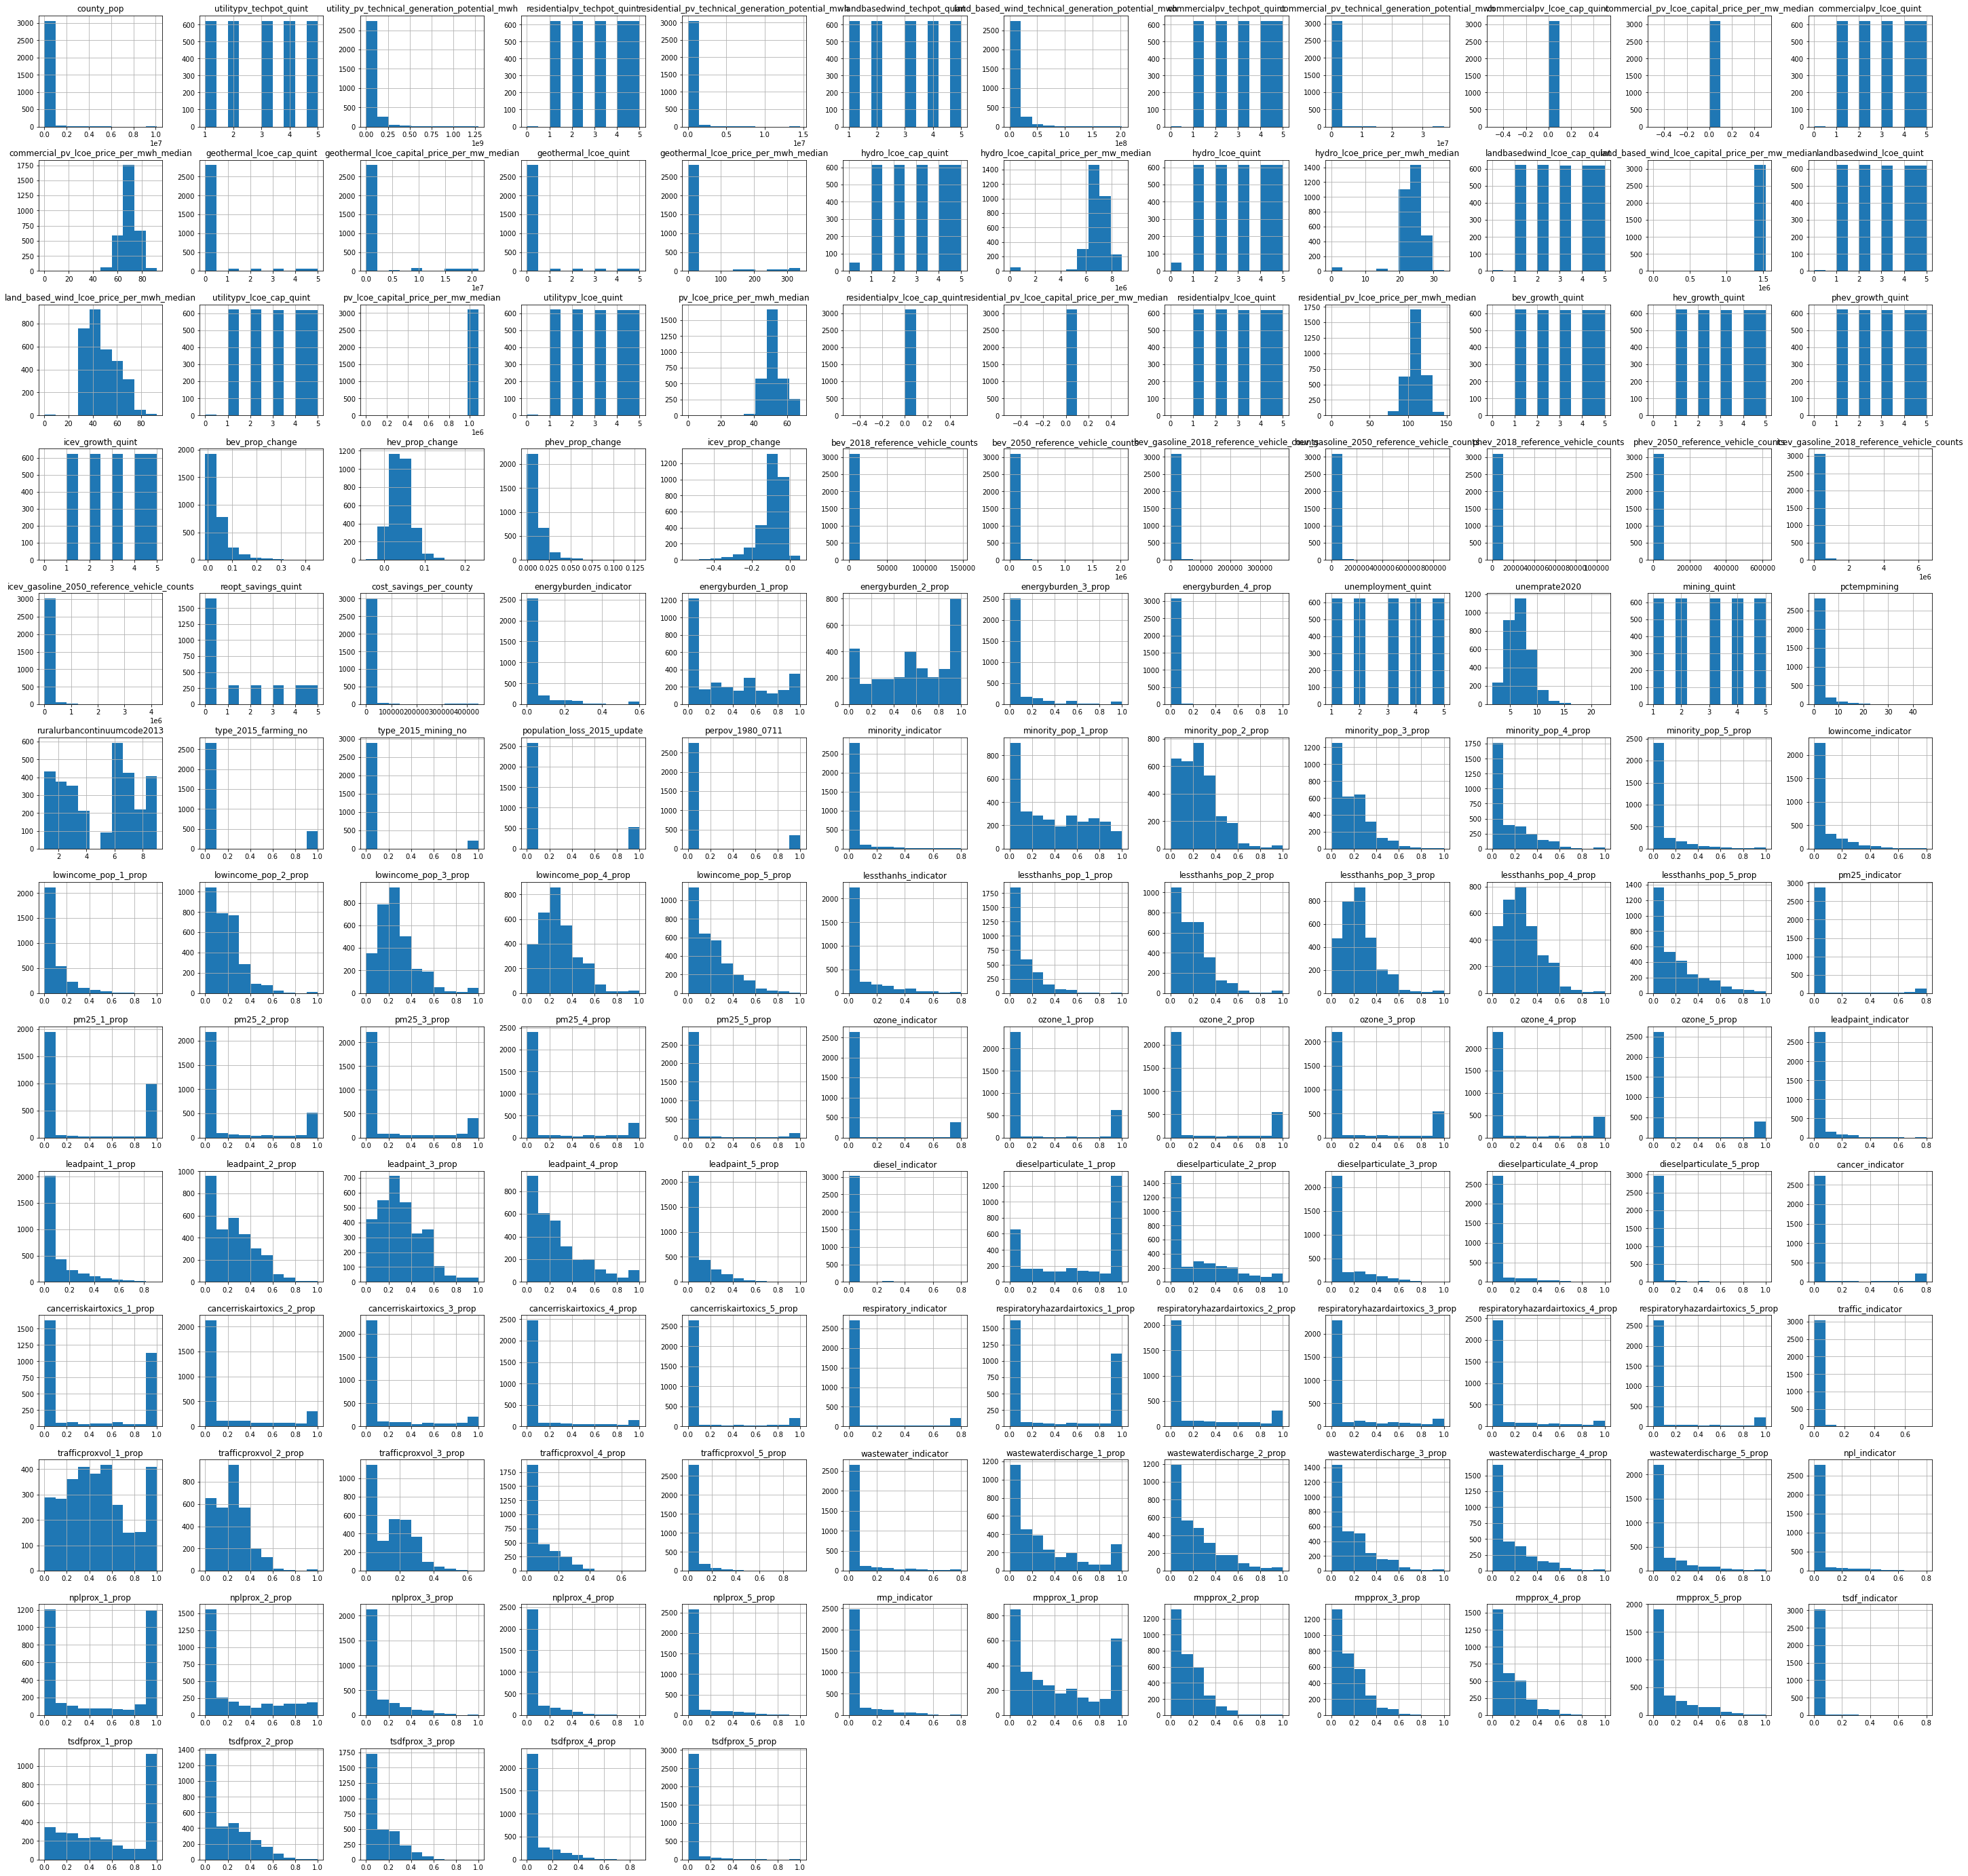

In [26]:
df.hist(figsize = (50,50));

### Commercial PV Heatmap

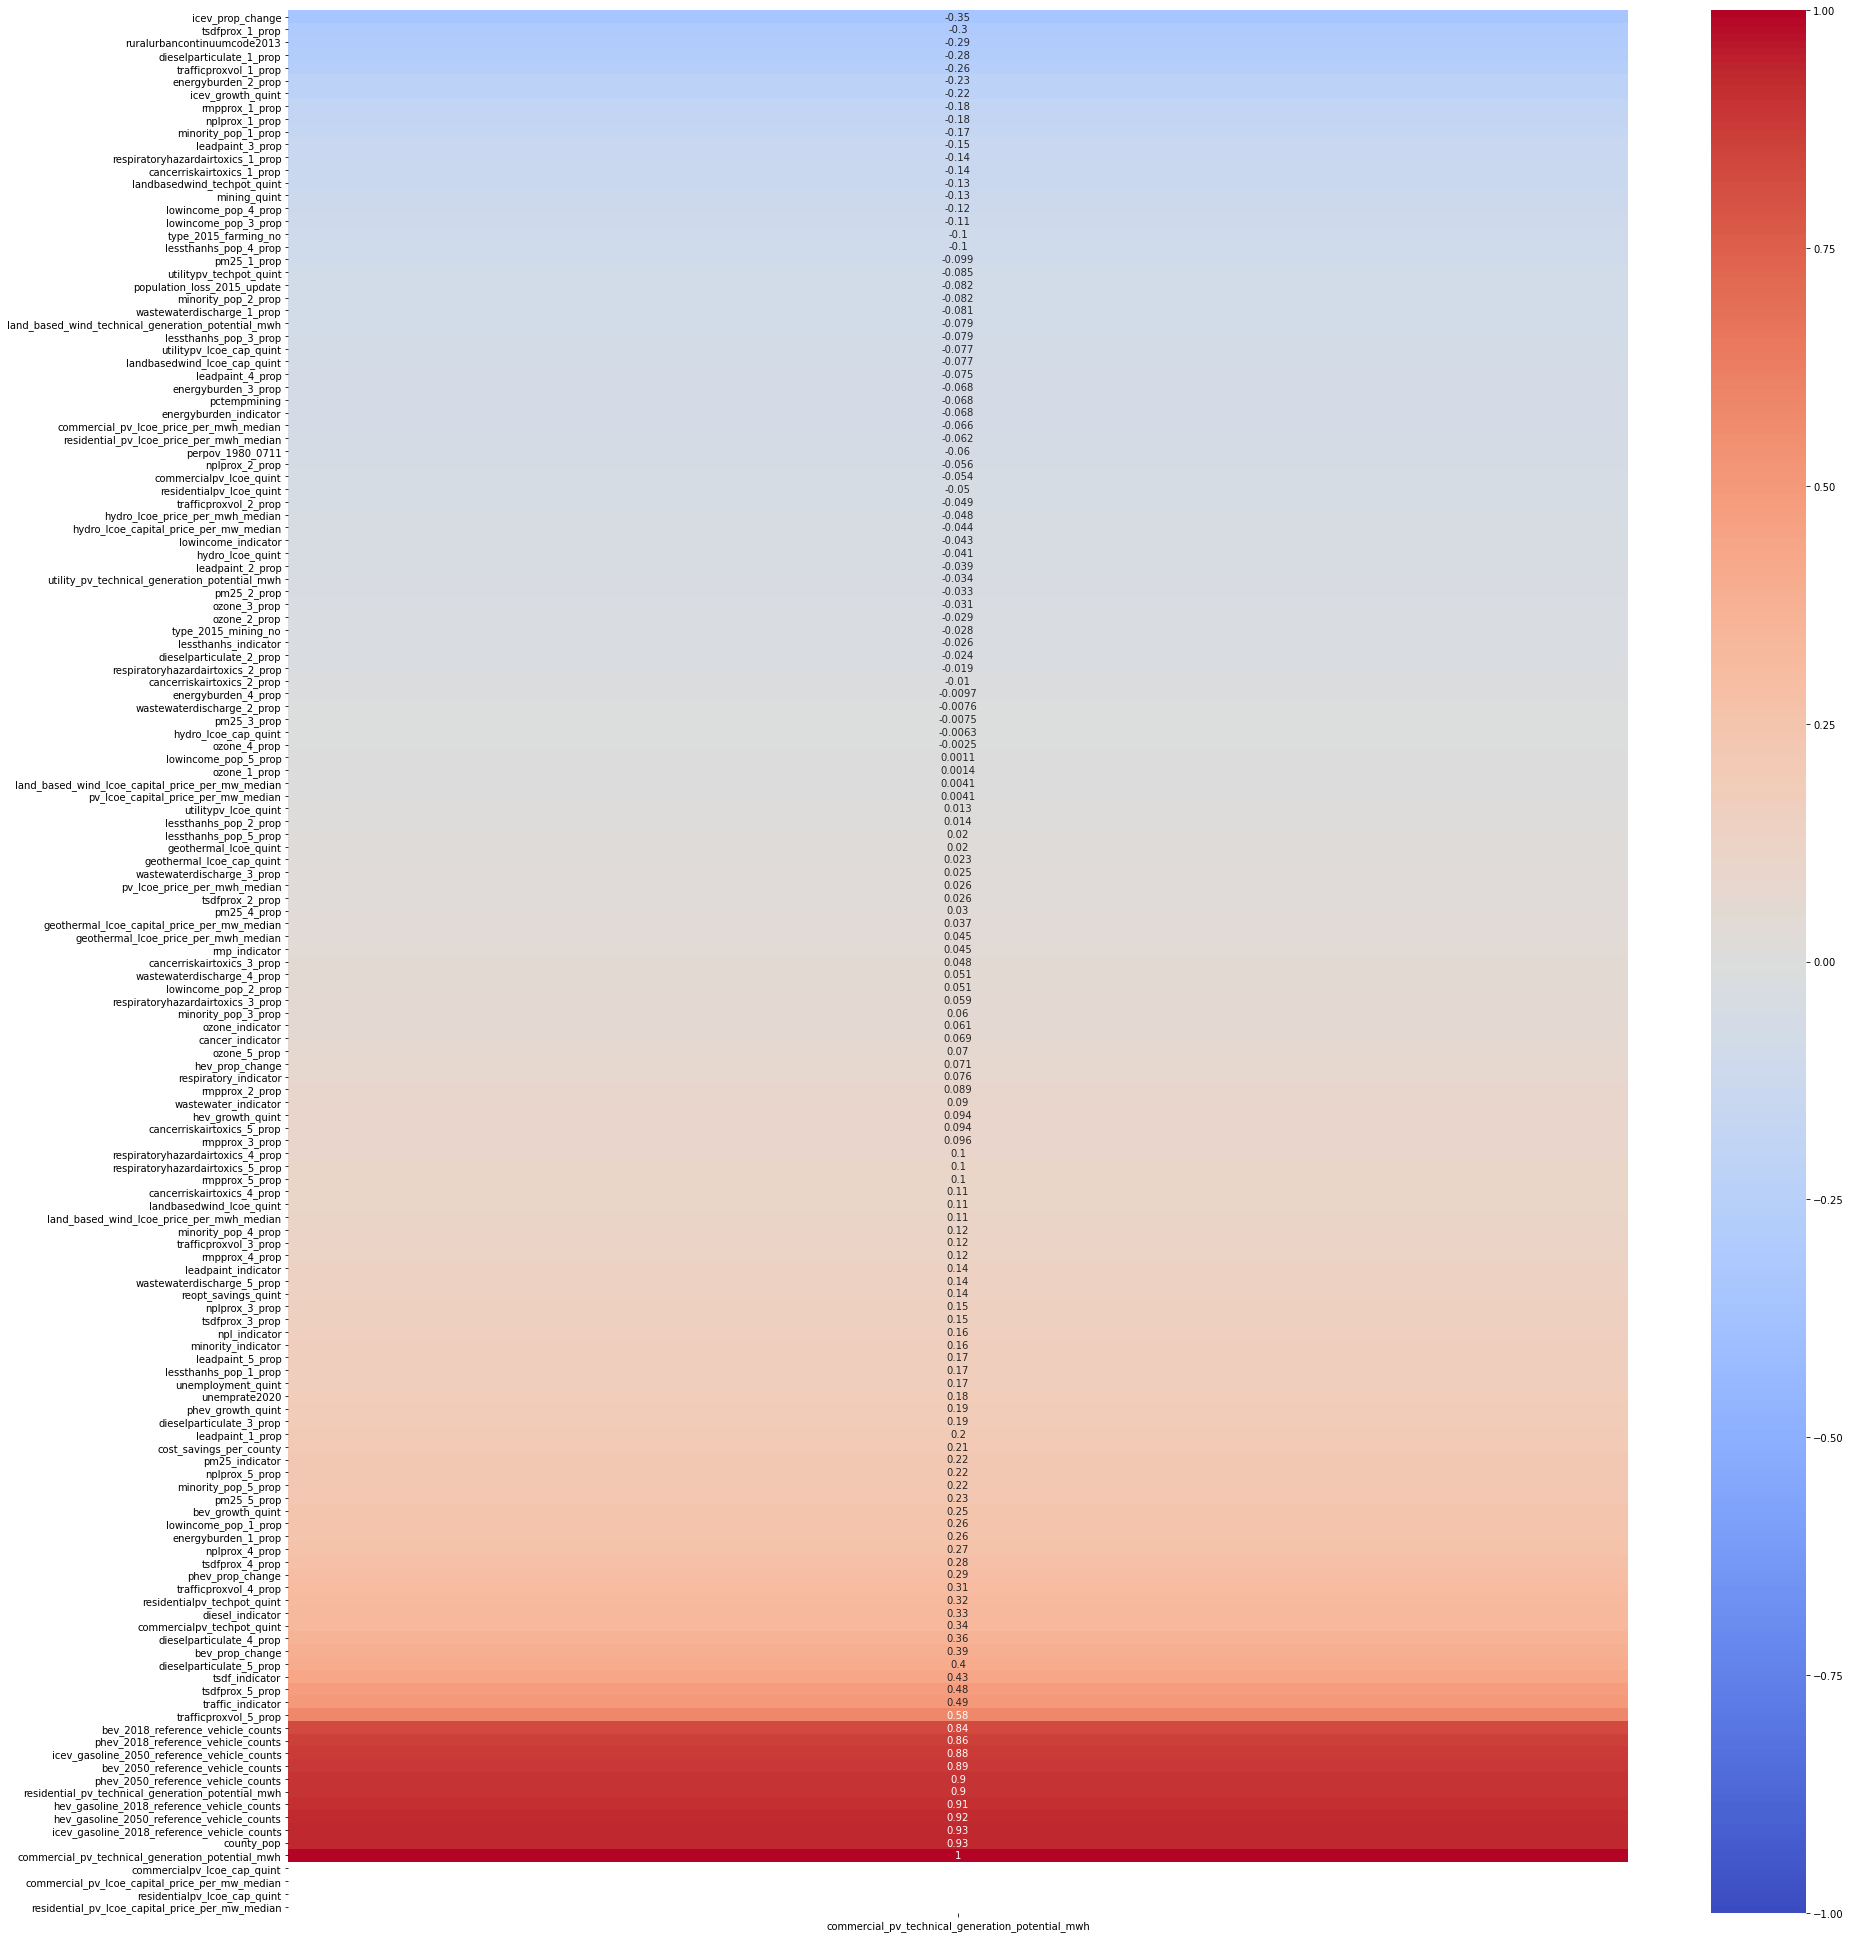

In [22]:
plt.figure(figsize=(30,35))

sns.heatmap(df.corr()[['commercial_pv_technical_generation_potential_mwh']].sort_values('commercial_pv_technical_generation_potential_mwh'),
            annot = True,
            cmap = 'coolwarm',
            vmin = -1,
            vmax = 1);

### Residentail PV Heatmap

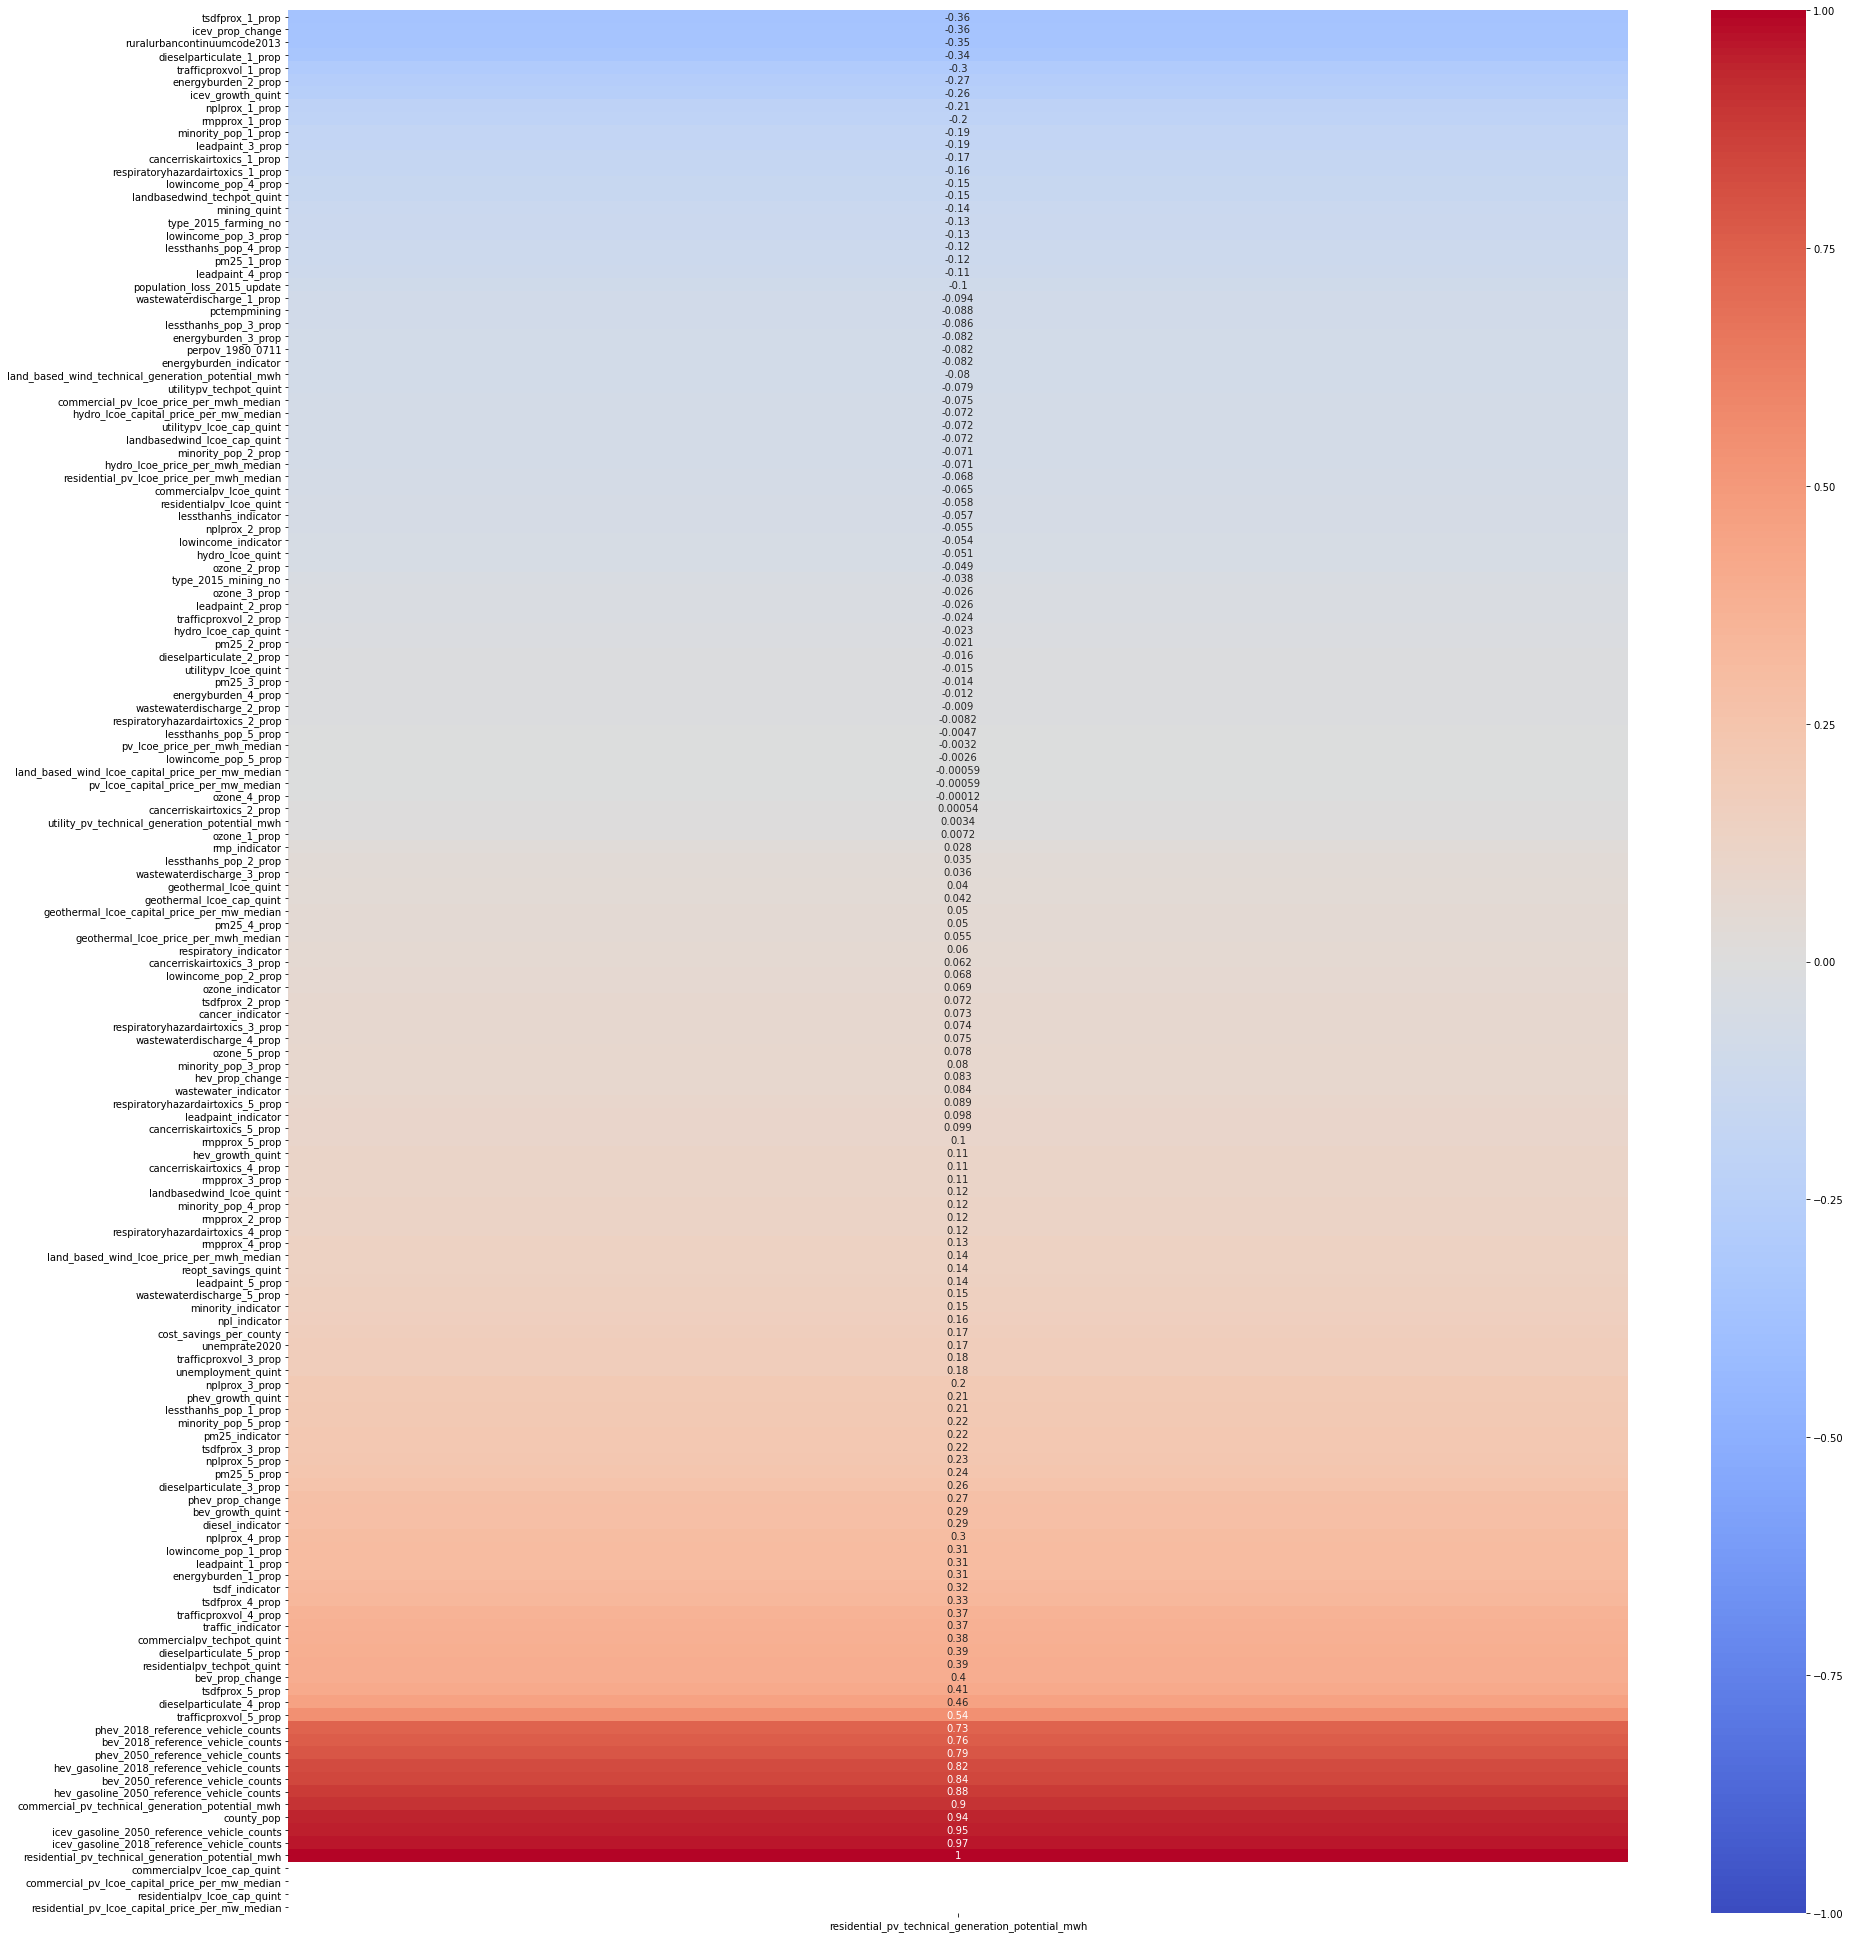

In [20]:
plt.figure(figsize=(30,35))

sns.heatmap(df.corr()[['residential_pv_technical_generation_potential_mwh']].sort_values('residential_pv_technical_generation_potential_mwh'),
            annot = True,
            cmap = 'coolwarm',
            vmin = -1,
            vmax = 1);

### Utility PV Heatmap

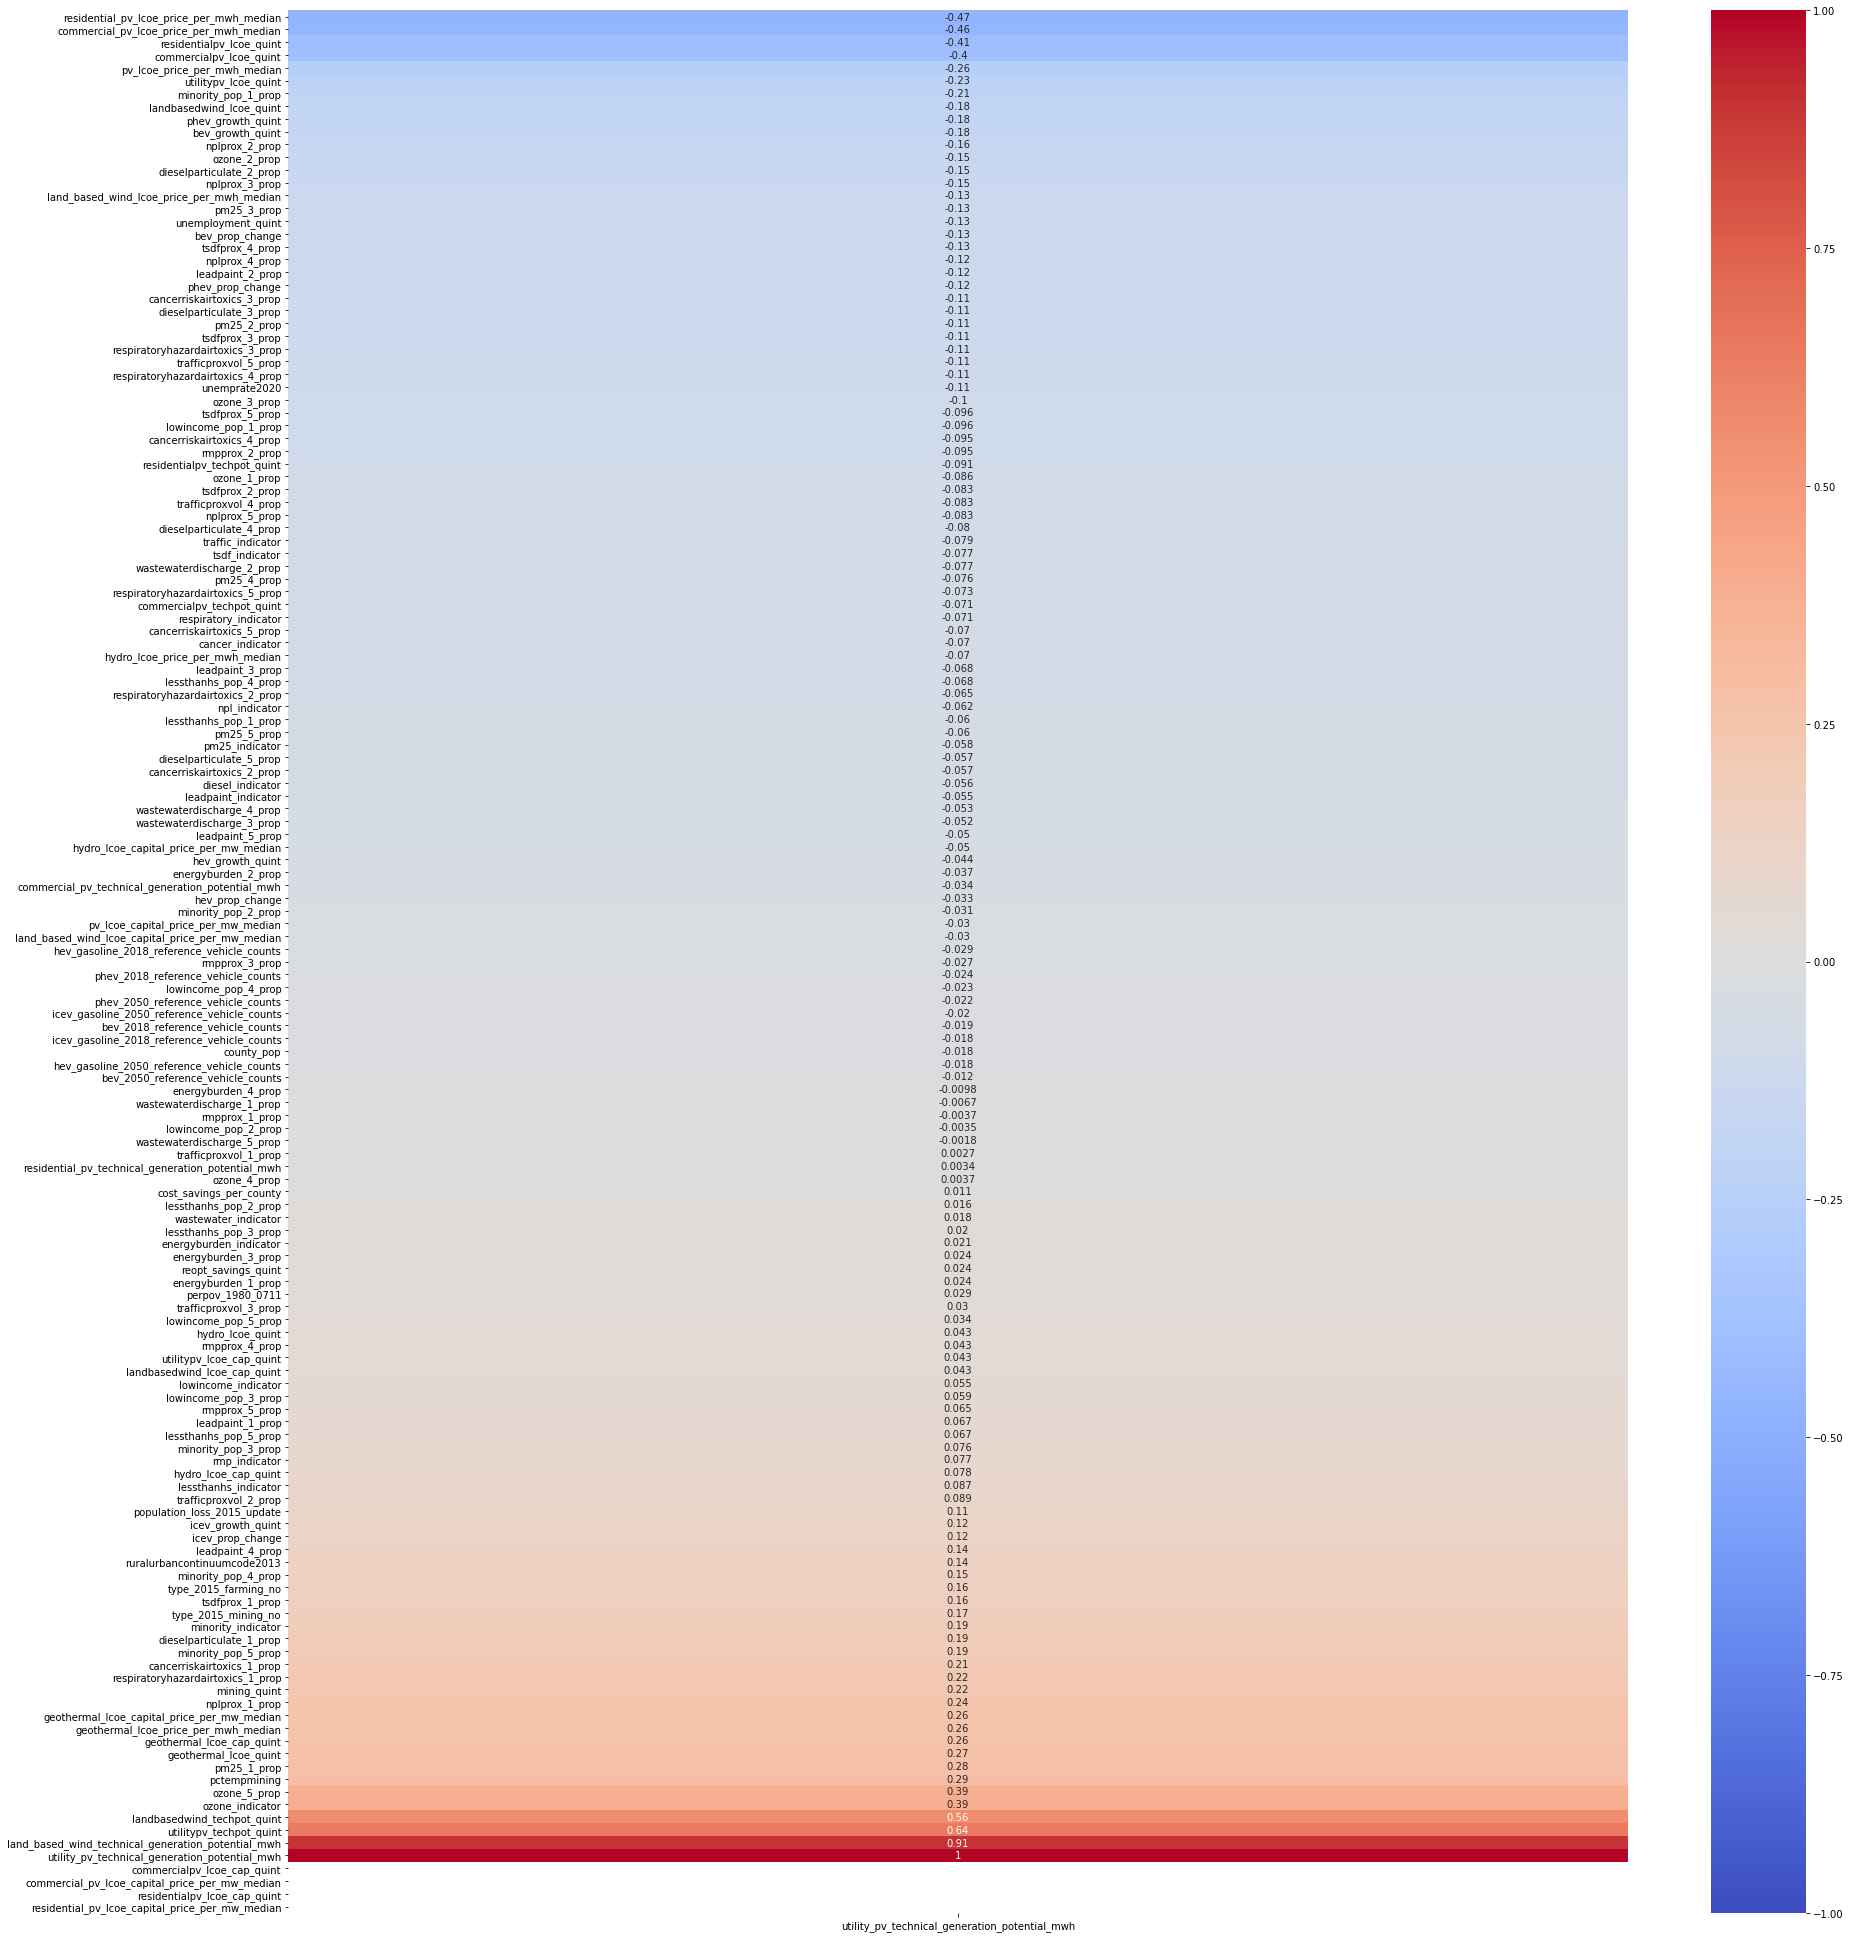

In [17]:
plt.figure(figsize=(30,35))

sns.heatmap(df.corr()[['utility_pv_technical_generation_potential_mwh']].sort_values('utility_pv_technical_generation_potential_mwh'),
            annot = True,
            cmap = 'coolwarm',
            vmin = -1,
            vmax = 1);

### Land Based Wind Heatmap

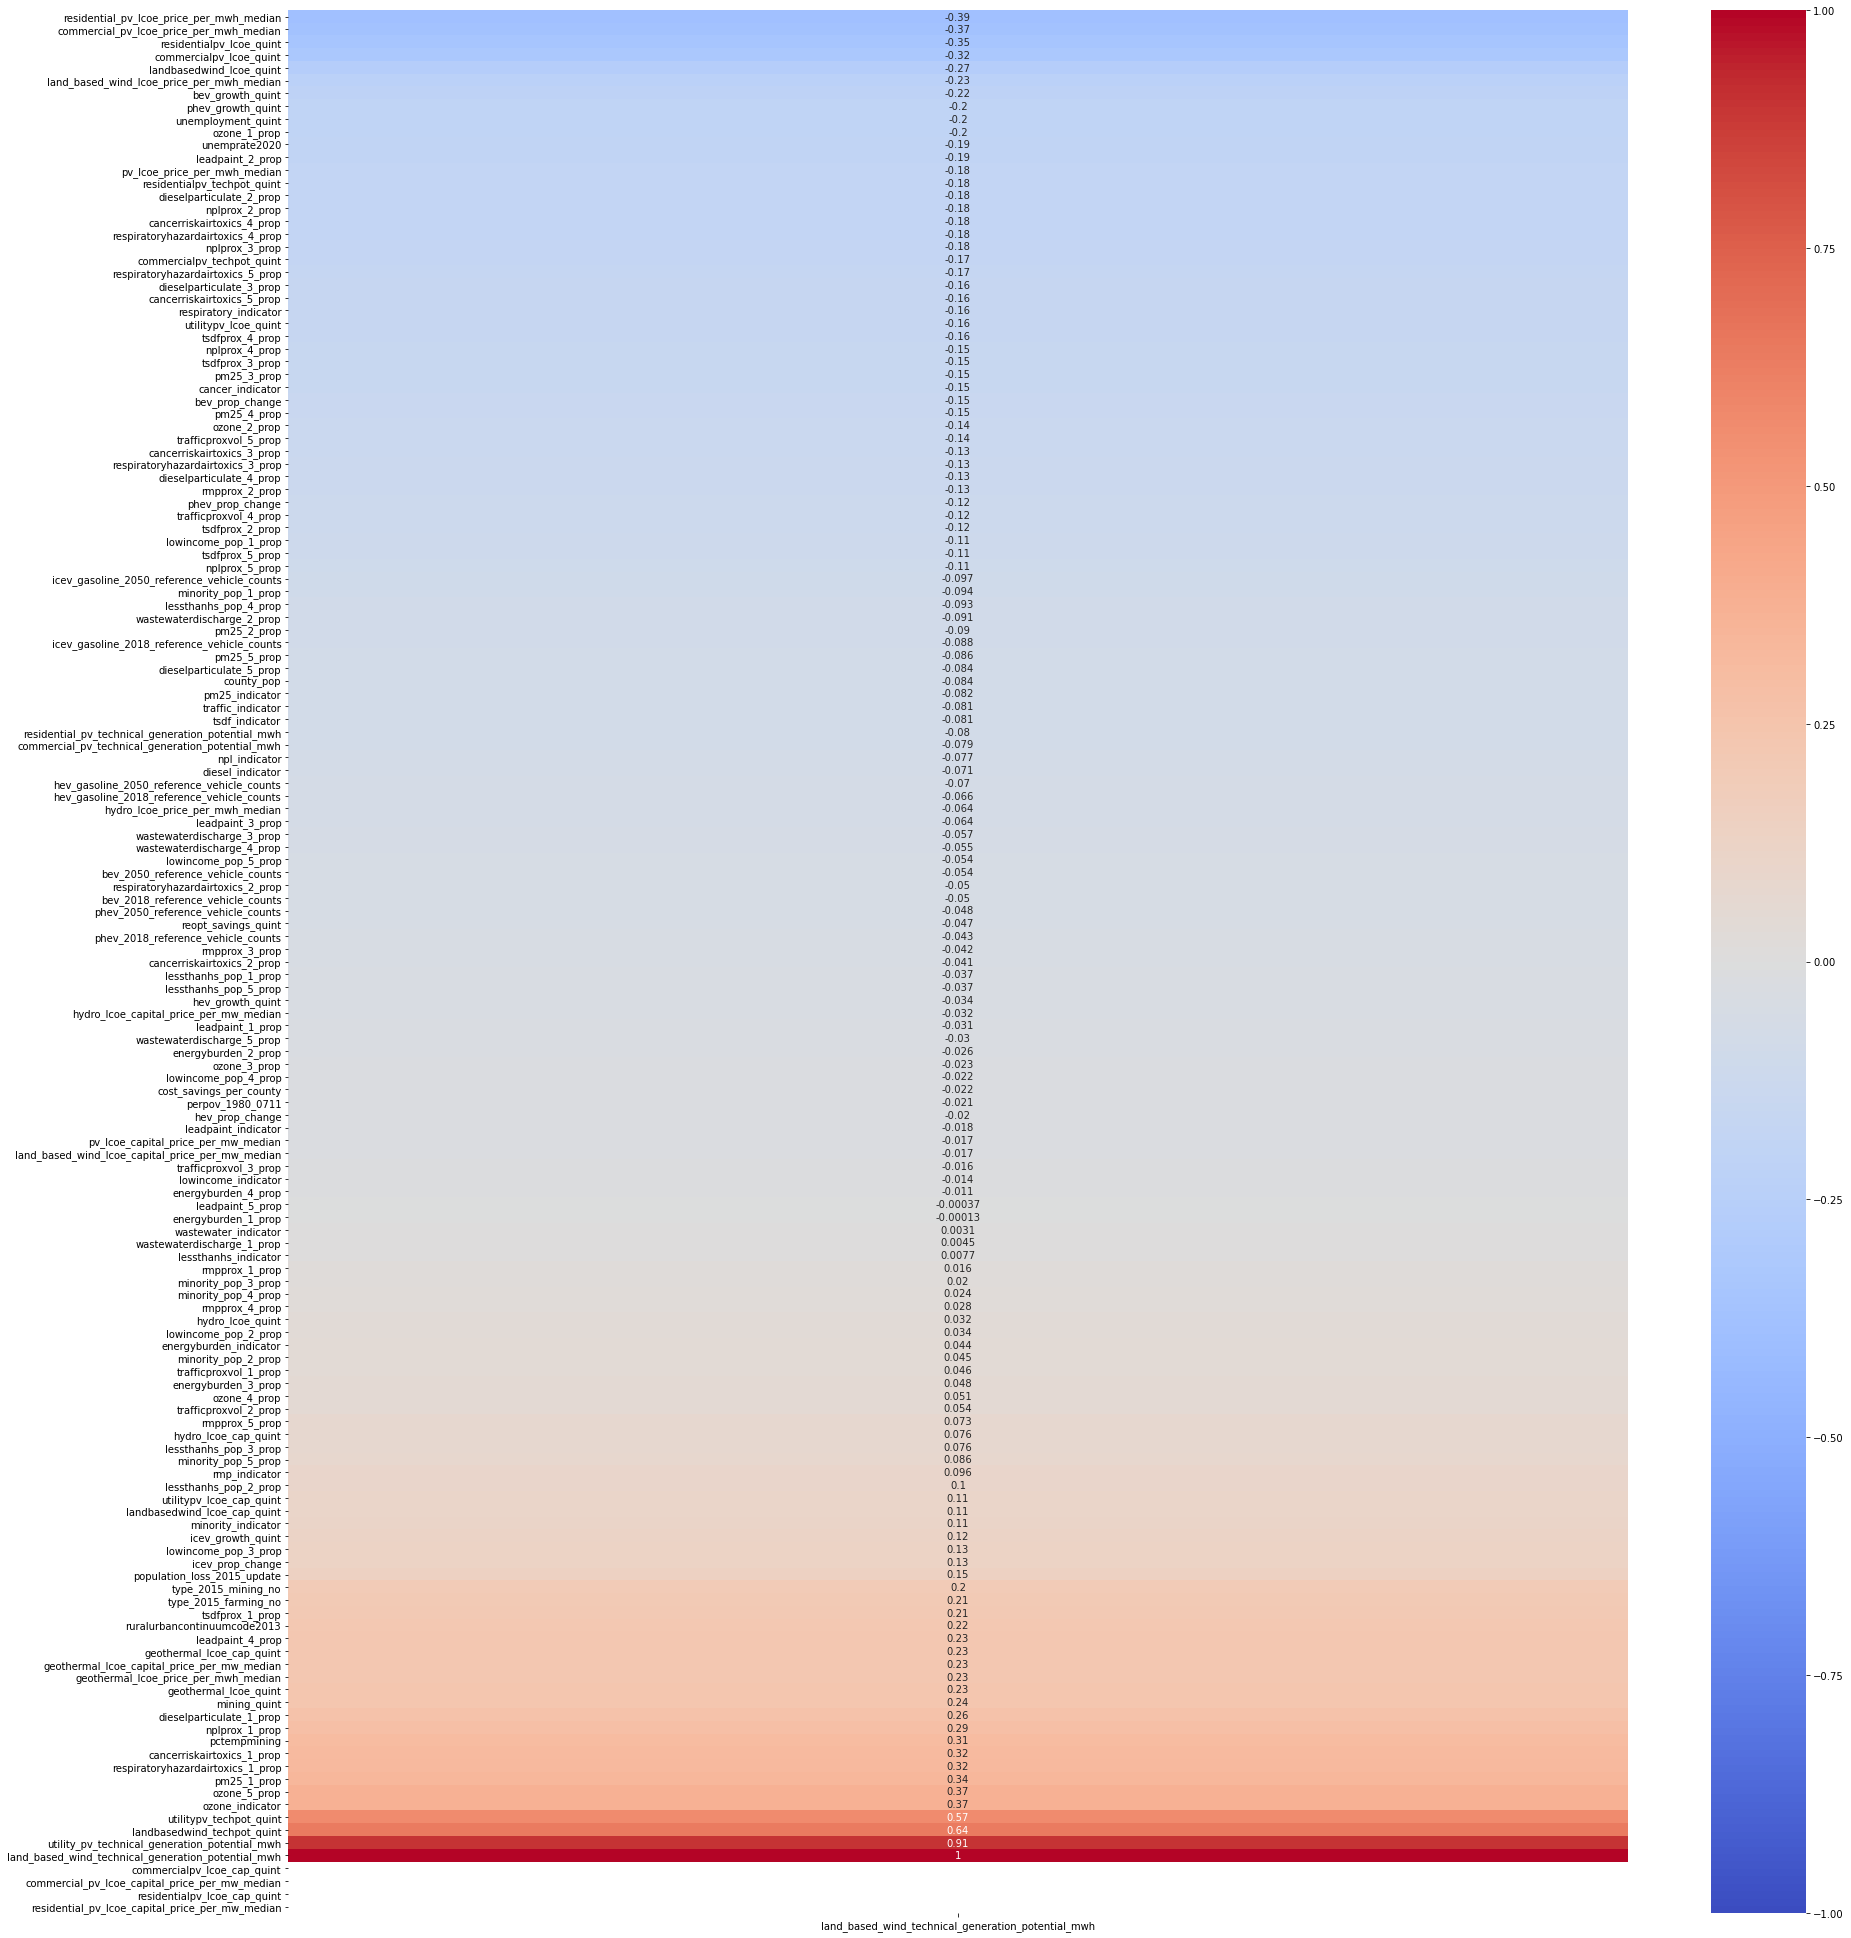

In [23]:
plt.figure(figsize=(30,35))

sns.heatmap(df.corr()[['land_based_wind_technical_generation_potential_mwh']].sort_values('land_based_wind_technical_generation_potential_mwh'),
            annot = True,
            cmap = 'coolwarm',
            vmin = -1,
            vmax = 1);

In [36]:
df['net_generation'] = df['land_based_wind_technical_generation_potential_mwh'] * df['utility_pv_technical_generation_potential_mwh'] * df['residential_pv_technical_generation_potential_mwh'] * df['commercial_pv_technical_generation_potential_mwh']

In [45]:
df.to_csv('data/eeip_cleaned')

In [39]:
df.head()

,county,state,county_pop,utilitypv_techpot_quint,utility_pv_technical_generation_potential_mwh,residentialpv_techpot_quint,residential_pv_technical_generation_potential_mwh,landbasedwind_techpot_quint,land_based_wind_technical_generation_potential_mwh,commercialpv_techpot_quint,commercial_pv_technical_generation_potential_mwh,commercialpv_lcoe_cap_quint,commercial_pv_lcoe_capital_price_per_mw_median,commercialpv_lcoe_quint,commercial_pv_lcoe_price_per_mwh_median,geothermal_lcoe_cap_quint,geothermal_lcoe_capital_price_per_mw_median,geothermal_lcoe_quint,geothermal_lcoe_price_per_mwh_median,hydro_lcoe_cap_quint,hydro_lcoe_capital_price_per_mw_median,hydro_lcoe_quint,hydro_lcoe_price_per_mwh_median,landbasedwind_lcoe_cap_quint,land_based_wind_lcoe_capital_price_per_mw_median,landbasedwind_lcoe_quint,land_based_wind_lcoe_price_per_mwh_median,utilitypv_lcoe_cap_quint,pv_lcoe_capital_price_per_mw_median,utilitypv_lcoe_quint,pv_lcoe_price_per_mwh_median,residentialpv_lcoe_cap_quint,residential_pv_lcoe_capital_price_per_mw_median,residentialpv_lcoe_quint,residential_pv_lcoe_price_per_mwh_median,bev_growth_quint,hev_growth_quint,phev_growth_quint,icev_growth_quint,bev_prop_change,hev_prop_change,phev_prop_change,icev_prop_change,bev_2018_reference_vehicle_counts,bev_2050_reference_vehicle_counts,hev_gasoline_2018_reference_vehicle_counts,hev_gasoline_2050_reference_vehicle_counts,phev_2018_reference_vehicle_counts,phev_2050_reference_vehicle_counts,icev_gasoline_2018_reference_vehicle_counts,icev_gasoline_2050_reference_vehicle_counts,reopt_savings_quint,cost_savings_per_county,energyburden_indicator,energyburden_1_prop,energyburden_2_prop,energyburden_3_prop,energyburden_4_prop,unemployment_quint,unemprate2020,mining_quint,pctempmining,ruralurbancontinuumcode2013,type_2015_farming_no,type_2015_mining_no,population_loss_2015_update,perpov_1980_0711,minority_indicator,minority_pop_1_prop,minority_pop_2_prop,minority_pop_3_prop,minority_pop_4_prop,minority_pop_5_prop,lowincome_indicator,lowincome_pop_1_prop,lowincome_pop_2_prop,lowincome_pop_3_prop,lowincome_pop_4_prop,lowincome_pop_5_prop,lessthanhs_indicator,lessthanhs_pop_1_prop,lessthanhs_pop_2_prop,lessthanhs_pop_3_prop,lessthanhs_pop_4_prop,lessthanhs_pop_5_prop,pm25_indicator,pm25_1_prop,pm25_2_prop,pm25_3_prop,pm25_4_prop,pm25_5_prop,ozone_indicator,ozone_1_prop,ozone_2_prop,ozone_3_prop,ozone_4_prop,ozone_5_prop,leadpaint_indicator,leadpaint_1_prop,leadpaint_2_prop,leadpaint_3_prop,leadpaint_4_prop,leadpaint_5_prop,diesel_indicator,dieselparticulate_1_prop,dieselparticulate_2_prop,dieselparticulate_3_prop,dieselparticulate_4_prop,dieselparticulate_5_prop,cancer_indicator,cancerriskairtoxics_1_prop,cancerriskairtoxics_2_prop,cancerriskairtoxics_3_prop,cancerriskairtoxics_4_prop,cancerriskairtoxics_5_prop,respiratory_indicator,respiratoryhazardairtoxics_1_prop,respiratoryhazardairtoxics_2_prop,respiratoryhazardairtoxics_3_prop,respiratoryhazardairtoxics_4_prop,respiratoryhazardairtoxics_5_prop,traffic_indicator,trafficproxvol_1_prop,trafficproxvol_2_prop,trafficproxvol_3_prop,trafficproxvol_4_prop,trafficproxvol_5_prop,wastewater_indicator,wastewaterdischarge_1_prop,wastewaterdischarge_2_prop,wastewaterdischarge_3_prop,wastewaterdischarge_4_prop,wastewaterdischarge_5_prop,npl_indicator,nplprox_1_prop,nplprox_2_prop,nplprox_3_prop,nplprox_4_prop,nplprox_5_prop,rmp_indicator,rmpprox_1_prop,rmpprox_2_prop,rmpprox_3_prop,rmpprox_4_prop,rmpprox_5_prop,tsdf_indicator,tsdfprox_1_prop,tsdfprox_2_prop,tsdfprox_3_prop,tsdfprox_4_prop,tsdfprox_5_prop,net_generation
0,Autauga,AL,55200,3,3.585222e+07,4.0,122752.69,3,4374954.41,3.0,72863.02,0.0,0.0,2.0,66.302167,0.0,0.0,0.0,0.0,2.0,6532994.0,1.0,23.0,1.0,1530092.0,5.0,67.0,1.0,1085440.0,3.0,51.0,0.0,0.0,2.0,103.667192,4.0,2.0,2.0,4.0,0.036473,0.026496,0.005495,-0.068464,151.0,2170.0,619.0,2151.0,37.0,343.0,47791.0,50162.0,0,0.000000,0.045833,0.583333,0.333333,0.083333,0.0,1,4.9,3,0.354783,2,0,0,0,0,0.0,0.000000,0.343750,0.468750,0.187500,0.0000

## Model

In [46]:
df = pd.read_csv('data/eeip_cleaned')

In [54]:
df = pd.get_dummies(df, drop_first = True)

In [93]:
X = df.drop(columns = 'net_generation')
y = df['net_generation']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 33)

In [86]:
y_train.value_counts(normalize=True)

0.000000e+00    0.033789
1.609763e+22    0.000402
1.749809e+23    0.000402
9.355733e+24    0.000402
4.626117e+26    0.000402
                  ...   
1.985352e+25    0.000402
7.525983e+23    0.000402
7.447447e+21    0.000402
2.647298e+24    0.000402
4.841123e+25    0.000402
Name: net_generation, Length: 2403, dtype: float64

In [87]:
lr = LinearRegression()
lasso = Lasso()
ridge = Ridge()
dt = DecisionTreeRegressor(max_depth=3,
                             random_state=33)

### Linear Regression

In [88]:
X = df.drop(columns = 'net_generation')
X = sm.add_constant(X)
y = df['net_generation']
ols = sm.OLS(y, X).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         net_generation   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     78.48
Date:                Thu, 27 Jan 2022   Prob (F-statistic):               0.00
Time:                        18:28:59   Log-Likelihood:            -1.9808e+05
No. Observations:                3108   AIC:                         4.001e+05
Df Residuals:                    1132   BIC:                         4.121e+05
Df Model:                        1975                                         
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
const                                               3.499e+26    8.8e+26      0.398      0.691   -1.38e+27    2.08e+27
Unnamed: 0                                          6.141e+24    4.2e+24      1.463      0.144    -2.1e+24    1.44e+25
county_pop                                          1.806e+22    3.4e+21      5.317      0.000    1.14e+22    2.47e+22
utilitypv_techpot_quint                            -6.915e+25   1.08e+26     -0.641      0.521   -2.81e+26    1.42e+26
utility_pv_technical_generation_potential_mwh       4.323e+18   3.36e+18      1.285      0.199   -2.28e+18    1.09e+19
residentialpv_techpot_quint                         4.924e+25   1.14e+26      0.432      0.666   -1.74e+26    2.73e+26
residential_pv_technical_generation_potential_mwh  -5.262e+21   8.54e+20     -6.161      0.000   -6.94e+21   -3.59e+21
landbasedwind_techpot_quint                         3.402e+26   1.03e+26      3.314      0.001    1.39e+26    5.42e+26
land_based_wind_technical_generation_potential_mwh -3.434e+19   1.72e+19     -1.994      0.046   -6.81e+19   -5.51e+17
commercialpv_techpot_quint                           -1.4e+26   9.65e+25     -1.451      0.147   -3.29e+26    4.93e+25
commercial_pv_technical_generation_potential_mwh    1.552e+21    3.6e+20      4.315      0.000    8.46e+20    2.26e+21
commercialpv_lcoe_cap_quint                        -3.839e+23    1.3e+22    -29.641      0.000   -4.09e+23   -3.58e+23
commercial_pv_lcoe_capital_price_per_mw_median      2.656e+23   8.96e+21     29.651      0.000    2.48e+23    2.83e+23
commercialpv_lcoe_quint                               4.2e+25   1.49e+26      0.283      0.778    -2.5e+26    3.34e+26
commercial_pv_lcoe_price_per_mwh_median            -4.423e+25   4.41e+25     -1.003      0.316   -1.31e+26    4.23e+25
geothermal_lcoe_cap_quint                          -1.231e+28   1.84e+27     -6.672      0.000   -1.59e+28   -8.69e+27
geothermal_lcoe_capital_price_per_mw_median          1.63e+22   1.28e+21     12.777      0.000    1.38e+22    1.88e+22
geothermal_lcoe_quint                               9.305e+27   1.81e+27      5.135      0.000    5.75e+27    1.29e+28
geothermal_lcoe_price_per_mwh_median               -9.608e+26   7.54e+25    -12.751      0.000   -1.11e+27   -8.13e+26
hydro_lcoe_cap_quint                               -3.202e+26   1.53e+26     -2.094      0.037    -6.2e+26   -2.01e+25
hydro_lcoe_capital_price_per_mw_median              9.537e+20   4.35e+20      2.194      0.028    1.01e+20    1.81e+21
hydro_lcoe_quint                                    4.492e+26   1.55e+26      2.893      0.004    1.45e+26    7.54e+26
hydro_lcoe_price_per_mwh_median                    -4.681e+26   1.26e+26     -3.717      0.000   -7.15e+26  

In [89]:
lr.fit(X,y)
lr.coef_

array([-1.25608943e+29,  6.13711669e+24,  1.80608916e+22, ...,
       -1.64410841e+28, -1.53973081e+28, -1.67287814e+28])

In [90]:
set(zip(X.columns, lr.coef_))

{('county_Chautauqua', -4.309595438018186e+26),
 ('county_Howard', -1.2831817217486459e+27),
 ('county_Texas', -3.021525308326724e+27),
 ('utilitypv_lcoe_quint', -1.132343409740098e+26),
 ('county_Gonzales', -4.109734694226474e+26),
 ('county_Garza', -4.7555081817951835e+26),
 ('county_Emmons', -1.836739800369586e+27),
 ('county_Atascosa', 2.5524261780137645e+26),
 ('cancer_indicator', -6.116448142803453e+26),
 ('const', -1.2560894312111511e+29),
 ('county_Lucas', -2.3518846227299149e+27),
 ('county_Aransas', 5.590391674633081e+26),
 ('county_Esmeralda', -9.127631628824259e+27),
 ('county_Kandiyohi', -2.1696627919616555e+27),
 ('county_Sweet Grass', -2.326018560735444e+27),
 ('county_Pima', 7.577855483568893e+28),
 ('county_Wagoner', -4.850509432017679e+26),
 ('county_Lavaca', 3.3912964139190845e+26),
 ('dieselparticulate_3_prop', -3.882374320276363e+27),
 ('county_Tazewell', -3.805028945206701e+26),
 ('county_Sabine', -6.939469842058177e+26),
 ('county_Rabun', -4.9891787891924215e+26)

In [91]:
y_preds = lr.predict(X)
y_preds

array([ 1.37810146e+24, -2.46638456e+26,  2.89926172e+26, ...,
        4.63599671e+24,  1.92283167e+23,  1.69233785e+24])

In [79]:
#sns.pairplot(pd.merge(X, y, left_index = True, right_index = True));

In [95]:
lr.fit(X_train, y_train)

lr.score(X_train, y_train)

0.9999443688682095

In [96]:
dummy = DummyRegressor()
dummy.fit(X_train, y_train)
dummy_preds = dummy.predict(X_test)

cross_val_score(dummy, X_train, y_train).mean()

-0.20392780354201095

## Decision Tree Regressor

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10,
                                                    random_state=33,
                                                    shuffle=True)

In [103]:
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=33)

In [106]:
max_depths = range(1, 20)
training_error = []
for max_depth in max_depths:
    model_1 = DecisionTreeRegressor(max_depth=max_depth)
    model_1.fit(X, y)
    training_error.append(mse(y, model_1.predict(X)))
    
testing_error = []
for max_depth in max_depths:
    model_2 = DecisionTreeRegressor(max_depth=max_depth)
    model_2.fit(X_train, y_train)
    testing_error.append(mse(y_test, model_2.predict(X_test)))

In [108]:
gs = GridSearchCV(dt,
                  param_grid = {'max_depth': range(1, 11),
                                'min_samples_split': range(10, 60, 10)},
                  cv=5,
                  n_jobs=1)

gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeRegressor(max_depth=3, random_state=33),
             n_jobs=1,
             param_grid={'max_depth': range(1, 11),
                         'min_samples_split': range(10, 60, 10)})

In [99]:
#plt.plot(df['net_genetation'].sort_values(),       
         #dt.predict(df['net_generation'].sort_values().to_frame()),
         #color='red', label='model',
         #linewidth=2)

In [ ]:
#dot_data = export_graphviz(dt, feature_names=['net_generation'],  
                           #filled=True, rounded=True)  

#graph = graphviz.Source(dot_data)
#graph.render("tree") 

In [ ]:
#plt.plot(max_depths, training_error, color='blue', label='Training error')
#plt.plot(max_depths, testing_error, color='green', label='Testing error')
#plt.xlabel('Tree depth')
#plt.axvline(x=7, color='orange', linestyle='--')
#plt.annotate('optimum = 7', xy=(7.5, 1.17), color='red')
#plt.ylabel('Mean squared error')
#plt.title('Hyperparameter Tuning', pad=15, size=15)
#plt.legend()
#plt.savefig('error.png')